In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img = cv2.imread("./bird.jpg")
img

array([[[ 66,  82,  64],
        [ 66,  82,  64],
        [ 67,  83,  65],
        ...,
        [ 72,  83,  67],
        [ 74,  85,  69],
        [ 73,  84,  68]],

       [[ 67,  83,  65],
        [ 67,  83,  65],
        [ 66,  82,  64],
        ...,
        [ 73,  84,  68],
        [ 73,  84,  68],
        [ 73,  84,  68]],

       [[ 66,  82,  64],
        [ 67,  83,  65],
        [ 67,  83,  65],
        ...,
        [ 73,  84,  68],
        [ 73,  84,  68],
        [ 73,  84,  68]],

       ...,

       [[194, 191, 207],
        [192, 189, 205],
        [190, 187, 203],
        ...,
        [ 54,  65,  57],
        [ 53,  64,  56],
        [ 54,  65,  57]],

       [[195, 189, 206],
        [192, 186, 203],
        [189, 183, 200],
        ...,
        [ 53,  64,  56],
        [ 53,  64,  56],
        [ 53,  64,  56]],

       [[193, 187, 204],
        [190, 184, 201],
        [187, 181, 198],
        ...,
        [ 55,  66,  58],
        [ 54,  65,  57],
        [ 52,  63,  55]]

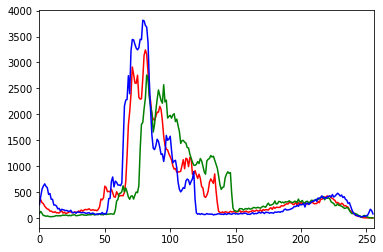

In [4]:
# Calculate histograms
hist_red = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_green = cv2.calcHist([img], [1], None, [256], [0, 256])
hist_blue = cv2.calcHist([img], [2], None, [256], [0, 256])

plt.plot(hist_red, color='r')
plt.plot(hist_green, color='g')
plt.plot(hist_blue, color='b')
plt.xlim([0, 256])
plt.show()

In [5]:
def class_average(cl, start, end):
    niv = np.arange(start, end)
    return np.sum(cl * niv) / np.sum(cl)

def get_variance(hist, s):
    c0 = hist[:s]
    c1 = hist[s:]
    pc0 = np.sum(c0) / np.sum(hist)
    pc1 = np.sum(c1) / np.sum(hist)
    m = class_average(hist, 0, 255)
    m0 = class_average(c0, 0, s)
    m1 = class_average(c1, s, 255)
    return pc0 * (m0 - m)**2 + pc1 * (m1 - m)**2

def otsu_thresholding(hist):
    max_variance = 0
    seuil = 0
    for s in range(1, 254):
        variance = get_variance(hist, s)
        if variance > max_variance:
            max_variance = variance
            seuil = s
    return seuil

otsu_thresholding(hist_blue)

106

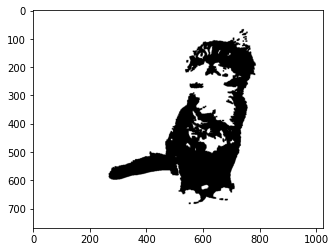

In [11]:
def extract_color_threshold(image: np.ndarray, threshold: int):
    return np.where(image >= threshold, 255, 0)

gray_img = cv2.imread("./cat2.jpg", cv2.IMREAD_GRAYSCALE)
binary_img = np.uint8(extract_color_threshold(gray_img, 120))

kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(binary_img, kernel, iterations=1)
plt.imshow(erosion, cmap='gray', vmin=0, vmax=255)
plt.show()

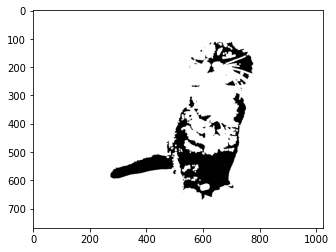

In [12]:
dilatation = cv2.dilate(binary_img, kernel, iterations=1)
plt.imshow(dilatation, cmap='gray', vmin=0, vmax=255)
plt.show()